# Assignment 1 - Data Collection and Analysis

## Objective

In this assignment, you as a class will collectively record a dataset with elevator arrival times on the ground floor in CDS.
Using this dataset, you will determine the best location to wait in order to minimize the expected walking distance to the next arriving elevator.

Learning goals:

- Practice collecting, interacting, and visualizing data.
- Practice making a hypothesis based on training data and then evaluating it on test data.

This assignment will be graded on a scale of full credit, partial credit, or no credit. You will get full credit if you collected data, proposed a reasonable location to wait for elevators at, and tested the proposed location on the data to see that it works. The questions are meant to guide you.

## Part 1: Data Collection (9/16 - 9/19)

For this homework, we will collect a dataset with elevator arrival times on the ground floor of CDS as a class.
 - We will use data from Mon 9/16 - Tue 9/17 as training data.
 - We will use data from Wed 9/18 - Thu 9/19 as test data.

To receive credit for this part, you should sign up for a 5 minute slot between 10-5pm on one of your assigned days. The assignment is by first name:
 - If your first name begins with A-N, please sign up for a 5-minute slot on Monday OR Tuesday.
 - If your first name begins with O-Z, please sign up for a 5-minute slot on Wednesday OR Thursday.

You cannot sign up for a slot that has already been taken.
[link to signup sheet](https://docs.google.com/spreadsheets/d/1RhYg51l02JTOEng71JC-4k1oPgTbd25ScAMqvcwDvuU/edit?usp=sharing).

During your assigned time slot, you should observe near the elevators on the ground floor (lobby level) of CDS and
fill in [this Google form](https://docs.google.com/forms/d/e/1FAIpQLSe72Ln_2ZeXiTxfr2r0QI3FLF5wdcXMka_1aZg2RhmQekmXEw/viewform?vc=0&c=0&w=1&flr=0&usp=mail_form_link) with the ID of the elevator when it arrives.
 In other words, when an elevator
door opens, select the elevator ID and submit the form. The timestamp will automatically be recorded. You must be signed in using your BU email to complete the form.

The responses to the Google form are recorded in [this Google spreadsheet](https://docs.google.com/spreadsheets/d/1VepMqIvBq-_oqa1a4RXY7SlLz2GtK4DpJLnBnA7GKOU/edit?usp=sharing), which you all have read access to. You must be signed in using your BU email to access the data.

Please use the following diagram to determine the elevator ID. (units expressed in meters)

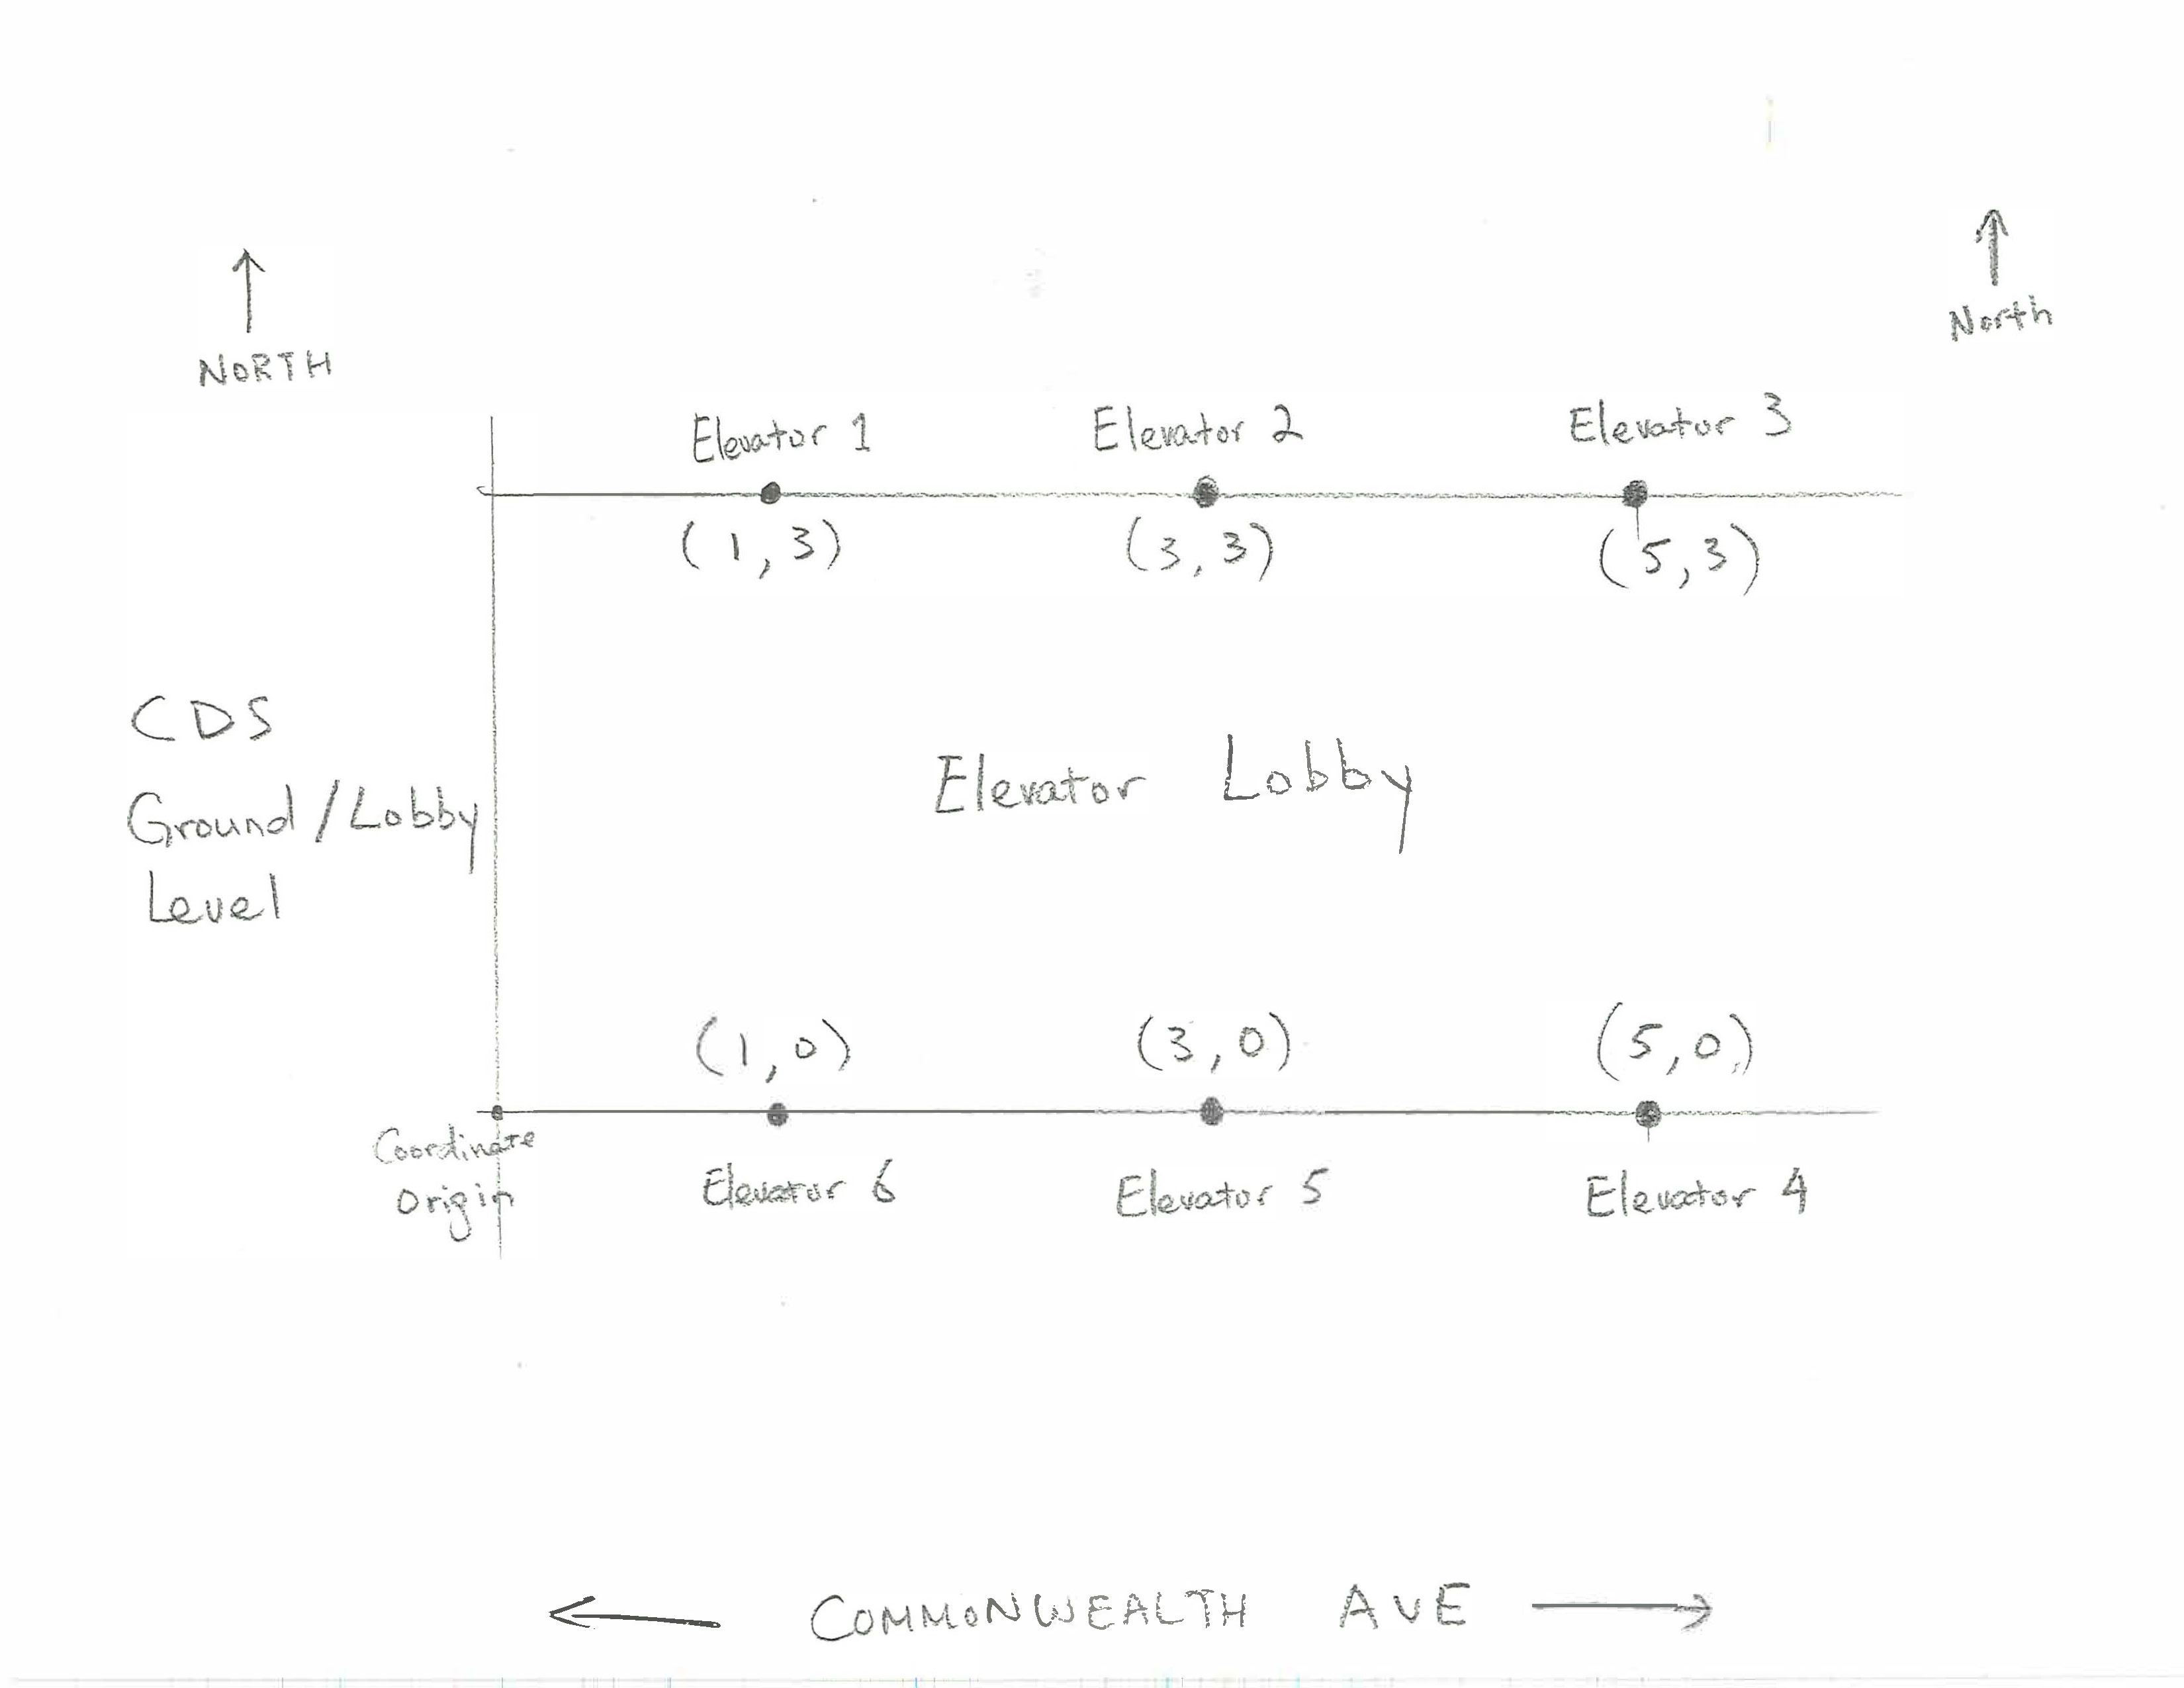

## Part 2: Determining the optimal place to stand

You can start this part after Tuesday 5 pm, when the last training data has been recorded. You are only allowed to use data from Monday 9/16 - Tuesday 9/17 for this part.

Please go to the google spreadsheet linked in the previous part and download the training data as a CSV file. Delete any rows that occur after 9/17. If you are working in Google Colab, you can upload the CSV to the server using the panel on the left.

**Question 1**: According to the diagram of elevator locations above, where should you wait for an elevator to minimize expected
walking distance to the next elevator to arrive, assuming the next elevator to arrive has an equal chance to be any one of the 6 available elevators? Please express your answer using the coordinate system in the diagram. Briefly justify your answer.

**Answer:** According to the diagram, (3,1.5) would be the best coordinate to stand. Since it's the midpoint on the x-axis ((1+5)/2) and the midpoint on the y-axis ((0+3)/2)).

**Question 2**: Use a plotting utility (e.g. `matplotlib.pyplot`) to plot the arrival times of elevators on the training data
(Monday 9/16 - Tuesday 9/17). The x-axis should be timestamp and the y-axis should be the elevator ID. I suggest using a scatter plot.
ChatGPT may be useful. Display the plot. List any observations
(e.g. cyclical patterns, some elevators arriving more frequently than others)

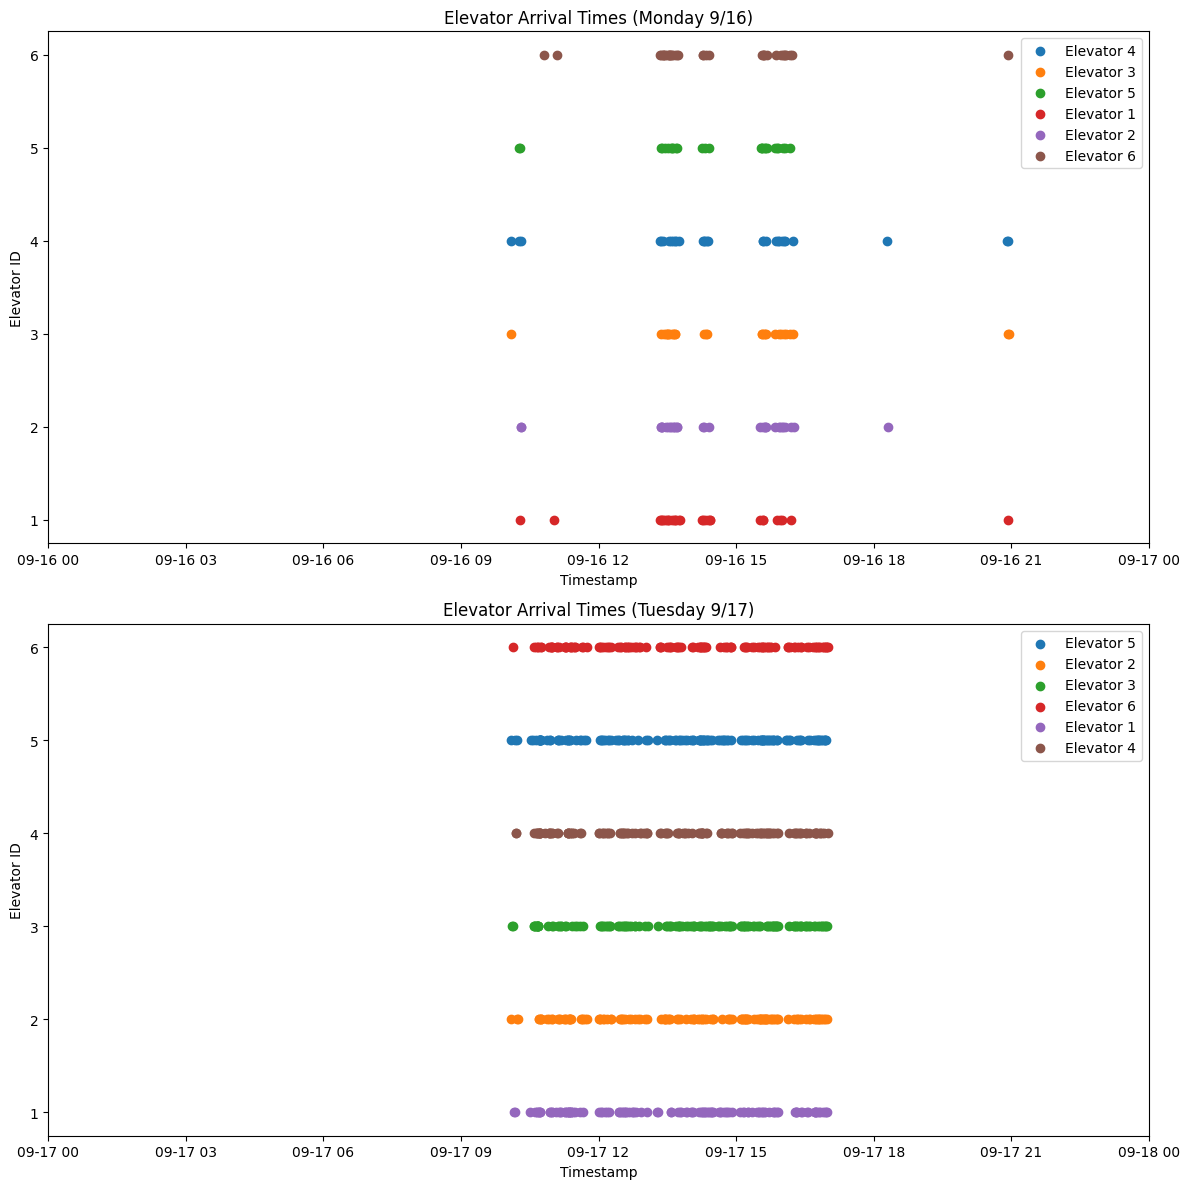

In [ ]:
# Making a plot for each day
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

def make_plots():
    df = pd.read_csv('CDS Elevator Arrivals (Responses) - Form Responses 1.csv')
    df['Timestamp'] = pd.to_datetime(df['Timestamp'])
    df = df[(df['Timestamp'].dt.date >= datetime(2024, 9, 16).date()) &
            (df['Timestamp'].dt.date <= datetime(2024, 9, 17).date())]

    #Monday
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
    monday_data = df[df['Timestamp'].dt.date == datetime(2024, 9, 16).date()]
    for elevator in monday_data['Elevator ID'].unique():
        elevator_data = monday_data[monday_data['Elevator ID'] == elevator]
        ax1.scatter(elevator_data['Timestamp'], elevator_data['Elevator ID'], label=f'Elevator {elevator}')

    ax1.set_xlabel('Timestamp')
    ax1.set_ylabel('Elevator ID')
    ax1.set_title('Elevator Arrival Times (Monday 9/16)')
    ax1.legend()
    ax1.set_xlim(datetime(2024, 9, 16), datetime(2024, 9, 17))

    #Tuesday
    tuesday_data = df[df['Timestamp'].dt.date == datetime(2024, 9, 17).date()]
    for elevator in tuesday_data['Elevator ID'].unique():
        elevator_data = tuesday_data[tuesday_data['Elevator ID'] == elevator]
        ax2.scatter(elevator_data['Timestamp'], elevator_data['Elevator ID'], label=f'Elevator {elevator}')

    ax2.set_xlabel('Timestamp')
    ax2.set_ylabel('Elevator ID')
    ax2.set_title('Elevator Arrival Times (Tuesday 9/17)')
    ax2.legend()
    ax2.set_xlim(datetime(2024, 9, 17), datetime(2024, 9, 18))

    plt.tight_layout()
    plt.show()

make_plots()

Observations: The peak times are the same across all elevators. When there is a gap in arrival times, indicated by breaks in the points on the graph, it occurs uniformly for all elevators. There are no periods where only some elevators are arriving while others are not.


**Question 3**: Make a table listing the average *frequency*
for each elevator in arrivals per second.
Based on the table you made, do you think it is optimal
to wait in the location you answered for question 1? Explain why or why not. Note that you will need to process the data to take into account
gaps in the data collection. For example, if no one collected data for 1-2pm, you should subtract that from the total time.

In [ ]:
import pandas as pd
from datetime import datetime

def calculate_elevator_stats():
    # Load and preprocess the data
    df = pd.read_csv('CDS Elevator Arrivals (Responses) - Form Responses 1.csv')
    df['Timestamp'] = pd.to_datetime(df['Timestamp'])
    df = df[(df['Timestamp'].dt.date >= datetime(2024, 9, 16).date()) &
            (df['Timestamp'].dt.date <= datetime(2024, 9, 17).date())]
    df = df.sort_values('Timestamp')

    # Calculate the time difference between consecutive rows and exclude differences greater than 2 minutes (120 seconds)
    df['Time Diff'] = df['Timestamp'].diff().dt.total_seconds()
    df['Time Diff'].fillna(0, inplace=True)  # Fill NaN for the first row

    # Only count time intervals less than or equal to 120 seconds
    df['Effective Time Diff'] = df['Time Diff'].apply(lambda x: x if x <= 300 else 0)

    # Calculate the total effective collection time (where the time difference is <= 2 minutes)
    total_effective_time = df['Effective Time Diff'].sum()

    # Prepare results
    results = {
        'Elevator ID': [],
        'Total data collection time (seconds)': [],
        'Number of arrivals': [],
        'Average frequency (arrivals per second)': []
    }

    # Calculate stats for each elevator
    for elevator in range(1, 7):
        elevator_data = df[df['Elevator ID'] == elevator]

        if len(elevator_data) > 0:
            arrivals = len(elevator_data)
            # Use the effective total time for frequency calculation
            frequency = arrivals / total_effective_time if total_effective_time > 0 else 0
        else:
            arrivals = 0
            frequency = 0

        results['Elevator ID'].append(elevator)
        results['Total data collection time (seconds)'].append(round(total_effective_time, 2))
        results['Number of arrivals'].append(arrivals)
        results['Average frequency (arrivals per second)'].append(round(frequency, 6))

    return pd.DataFrame(results)

# Calculate stats and print the table
elevator_stats = calculate_elevator_stats()
print(elevator_stats.to_string(index=False))

# Evaluate if waiting at the midpoint is optimal based on elevator frequency
def evaluate_optimality(stats_df):
    total_frequency = stats_df['Average frequency (arrivals per second)'].sum()
    midpoint_frequency = stats_df[stats_df['Elevator ID'].isin([3, 4])]['Average frequency (arrivals per second)'].sum()

    if midpoint_frequency >= total_frequency / 2:
        print("\nWaiting at the midpoint is optimal because it has the highest or balanced frequency of arrivals.")
    else:
        print("\nWaiting at the midpoint may not be optimal. Consider a location closer to elevators with higher frequencies.")

# Call the evaluation function
evaluate_optimality(elevator_stats)


 Elevator ID  Total data collection time (seconds)  Number of arrivals  Average frequency (arrivals per second)
           1                               24260.0                 155                                 0.006389
           2                               24260.0                 162                                 0.006678
           3                               24260.0                 170                                 0.007007
           4                               24260.0                 168                                 0.006925
           5                               24260.0                 167                                 0.006884
           6                               24260.0                 159                                 0.006554

Waiting at the midpoint may not be optimal. Consider a location closer to elevators with higher frequencies.


**Answer:**

| Elevator ID | 1 | 2 | 3 | 4 | 5 | 6 |
| ----------- | --- |--- |--- |--- |--- |--- |
| Total data collection time (seconds) |  24260.0 |  24260.0 |  24260.0 |  24260.0 |  24260.0 | 24260.0 |
| Number of arrivals | 155 | 162 | 170 | 168 | 167 |159 |
| Average frequency (arrivals per second) | 0.006389 | 0.006678 | 0.007007 |  0.006925 | 0.006884 |0.006554 |

** *texto en cursiva*Question 4** : Let's say I just arrived in the lobby and have no prior knowledge (e.g. which floor the elevators are currently on or which elevator was the last to arrive).
Using the results from question 3, determine the probability of each elevator being the next to arrive. Present these probabilities in a table and ensure they sum to one. Provide an intuitive explanation to support your answer.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

data = {
    'Elevator ID': [1, 2, 3, 4, 5, 6],
    'Average frequency (arrivals per second)': [0.006389, 0.006678, 0.007007, 0.006925, 0.006884, 0.006554]
}
df = pd.DataFrame(data)
total_frequency = df['Average frequency (arrivals per second)'].sum()
df['Probability of next arrival'] = df['Average frequency (arrivals per second)'] / total_frequency
print(df.to_string(index=False))

 Elevator ID  Average frequency (arrivals per second)  Probability of next arrival
           1                                 0.006389                     0.157999
           2                                 0.006678                     0.165146
           3                                 0.007007                     0.173282
           4                                 0.006925                     0.171254
           5                                 0.006884                     0.170240
           6                                 0.006554                     0.162079


**Answer:**

| Elevator ID | 1 | 2 | 3 | 4 | 5 | 6 |
| ----------- | --- |--- |--- |--- |--- |--- |
| Probability of being next elevator to arrive | 0.157999 | 0.165146 | 0.173282 | 0.171254 | 0.170240 | 0.162079 |

**Question 5**: Calculate the optimal location to wait for an elevator based on your answer to the previous question. Give your answer as a coordinate
using the coordinate system of the diagram at the beginning of this assignment. Justify your answer briefly.


In [12]:
import numpy as np
import matplotlib.pyplot as plt
elevators = {
    1: {'coord': (1, 3), 'prob': 0.157999},
    2: {'coord': (3, 3), 'prob': 0.165146},
    3: {'coord': (5, 3), 'prob': 0.173282},
    4: {'coord': (5, 0), 'prob': 0.171254},
    5: {'coord': (3, 0), 'prob': 0.170240},
    6: {'coord': (1, 0), 'prob': 0.162079}
}
optimal_x = sum(elev['coord'][0] * elev['prob'] for elev in elevators.values())
optimal_y = sum(elev['coord'][1] * elev['prob'] for elev in elevators.values())

print(f"Optimal waiting location: ({optimal_x:.6f}, {optimal_y:.6f})")

Optimal waiting location: (3.048916, 1.489281)


**Answer:** Here, we calculate the weighted average, by each elevator's probability of arrival. It assumes that the best waiting spot is one that minimises the expected distance to the next arriving elevator, taking into account the likelihood of each elevator arriving.

**Question 6**: On the training data, calculate the average distance traveled to the next elevator arrival if I wait at the location specified in question 1.
Then, calculate the average distance traveled if I wait at the location specified in question 5.

*Your answer to question 5 should result in a shorter average distance traveled.*

You are free to write your own code for these calculations, but we recommend implementing a function called `get_average_walk_distance(data, coordinate)`, since you will need to reuse this function.



In [13]:
import pandas as pd
import numpy as np
elevator_coords = {
    1: (1, 3),
    2: (3, 3),
    3: (5, 3),
    4: (5, 0),
    5: (3, 0),
    6: (1, 0)
}
df = pd.read_csv('CDS Elevator Arrivals (Responses) - Form Responses 1.csv')
def euclidean_distance(coord1, coord2):
    return np.sqrt((coord1[0] - coord2[0])**2 + (coord1[1] - coord2[1])**2)

def get_average_walk_distance(df, coordinate):
    df['Timestamp'] = pd.to_datetime(df['Timestamp'])
    df = df[(df['Timestamp'].dt.date >= datetime(2024, 9, 16).date()) &
            (df['Timestamp'].dt.date <= datetime(2024, 9, 17).date())]
    df = df.sort_values('Timestamp')

    total_distance = 0
    num_arrivals = len(df)
    for _, row in df.iterrows():
        elevator_id = row['Elevator ID']
        elevator_coord = elevator_coords[elevator_id]
        distance = euclidean_distance(coordinate, elevator_coord)
        total_distance += distance

    average_walk_distance = total_distance / num_arrivals

    return average_walk_distance

#location in q1
q1_coordinate = (3,1.5)
q1_avg_distance = get_average_walk_distance(df, q1_coordinate)
print(f"Average distance for question 1 location {q1_coordinate}: {q1_avg_distance:.4f}")
#location in q5
q5_coordinate = (3.048916, 1.489281)
q5_avg_distance = get_average_walk_distance(df, q5_coordinate)
print(f"Average distance for question 5 location {q5_coordinate}: {q5_avg_distance:.4f}")

Average distance for question 1 location (3, 1.5): 2.1646
Average distance for question 5 location (3.048916, 1.489281): 2.1640


**Answer:** The average distance in the calculated optimal coordinate from question 5 is 0.006 units shorter than the coordinates from question 1. Therefore, it is a slightly better location to stand.

## Part 3: Testing on evaluation data

You can start this part after Thursday 5 pm, when the last test data has been recorded.

Please go to the google spreadsheet linked in part 1 and download the data as a CSV file. Delete any rows that occurred before 9/18, since we used this for training already. If you are working in Google Colab, you can upload the CSV to the server using the panel on the left.

Use the `get_average_walk_distance` function you wrote for Part 2 Question 6 to calculate the average distance traveled to the next elevator arrival on the test data for both the coordinate specified in question 1 and the coordinate specified in question 5. Then, organize the numbers using the following table:

|Average Distance Walked (m) | Training Data | Test Data |
|----------------------------|---------------|-----------|
|Naive position (Question 1) | 2.1646 |   2.1646 |
|Smart position (Question 5) | 2.1640 |   2.1640 |

Did you succeed in finding a good location to wait for the elevators? If not, explain what might have gone wrong.

**Answer:** Yes, in both instances the smart position from question 5 provides a shorter average distance to each elevator than the naive position from question 1.

In [15]:
import pandas as pd
import numpy as np
elevator_coords = {
    1: (1, 3),
    2: (3, 3),
    3: (5, 3),
    4: (5, 0),
    5: (3, 0),
    6: (1, 0)
}
df = pd.read_csv('CDS Elevator Arrivals (Responses) - Form Responses 2.csv')
def euclidean_distance(coord1, coord2):
    return np.sqrt((coord1[0] - coord2[0])**2 + (coord1[1] - coord2[1])**2)

def get_average_walk_distance(df, coordinate):
    df['Timestamp'] = pd.to_datetime(df['Timestamp'])
    df = df[(df['Timestamp'].dt.date >= datetime(2024, 9, 18).date()) &
            (df['Timestamp'].dt.date <= datetime(2024, 9, 19).date())]
    df = df.sort_values('Timestamp')

    total_distance = 0
    num_arrivals = len(df)
    for _, row in df.iterrows():
        elevator_id = row['Elevator ID']
        elevator_coord = elevator_coords[elevator_id]
        distance = euclidean_distance(coordinate, elevator_coord)
        total_distance += distance

    average_walk_distance = total_distance / num_arrivals

    return average_walk_distance

#location in q1
q1_coordinate = (3,1.5)
q1_avg_distance = get_average_walk_distance(df, q1_coordinate)
print(f"Average distance for question 1 location {q1_coordinate}: {q1_avg_distance:.4f}")
#location in q5
q5_coordinate = (3.048916, 1.489281)
q5_avg_distance = get_average_walk_distance(df, q5_coordinate)
print(f"Average distance for question 5 location {q5_coordinate}: {q5_avg_distance:.4f}")

Average distance for question 1 location (3, 1.5): 2.1638
Average distance for question 5 location (3.048916, 1.489281): 2.1635
